In [2]:
import requests
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://docs.aiddata.org/ad4/datasets/Financing_the_2030_Agenda_for_Sustainable_Development_Dataset_Version_1_0.zip"
dataset_zip = "Financing_the_2030_Agenda.zip"

response = requests.get(url)
with open(dataset_zip, 'wb') as file:
    file.write(response.content)

In [ ]:
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [5]:
df = pd.read_csv("/Users/kiranm/Downloads/DAEN 690/Project Code/Financing_the_2030_Agenda_for_Sustainable_Development_Dataset_Version_1_0/Aggregates_Financing_the_2030_Agenda_for_Sustainable_Development_Dataset_Version_1_0.csv")

In [6]:
print(df.head())

print("\nMissing values per column:\n", df.isnull().sum())

   year  donor_code donor_name  recipient_code          recipient_name  \
0  2010           1    Austria              55                 Turkiye   
1  2010           1    Austria              57                  Kosovo   
2  2010           1    Austria              62                 Croatia   
3  2010           1    Austria              63                  Serbia   
4  2010           1    Austria              64  Bosnia and Herzegovina   

     recipient_region  disbursement  total_proj  sdg_1_sum  sdg_1_n_proj  ...  \
0  Europe and Eurasia    28804294.0           7        0.0             0  ...   
1  Europe and Eurasia    17303907.0          43     2106.0             1  ...   
2  Europe and Eurasia     5920229.0          11    18882.0             1  ...   
3  Europe and Eurasia    13613218.0          34    74293.5             5  ...   
4  Europe and Eurasia    32505626.0          52    13027.0             1  ...   

   sdg_15_sum  sdg_15_n_proj  sdg_16_sum  sdg_16_n_proj  sdg_17_sum 

In [7]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
                year    donor_code  recipient_code  disbursement    total_proj  \
count  82959.000000  82959.000000    82959.000000  8.295900e+04  82959.000000   
mean    2016.090780    596.160814      521.355501  3.646999e+07     30.334382   
std        3.384416    520.372162     1056.754934  2.214213e+08    101.993809   
min     2010.000000      1.000000       55.000000 -7.663994e+06      0.000000   
25%     2013.000000     21.000000      247.000000  1.543705e+05      2.000000   
50%     2016.000000    742.000000      342.000000  1.320231e+06      6.000000   
75%     2019.000000    959.000000      614.000000  9.991964e+06     24.000000   
max     2021.000000   1647.000000     9998.000000  1.233538e+10   9139.000000   

          sdg_1_sum  sdg_1_n_proj     sdg_2_sum  sdg_2_n_proj     sdg_3_sum  \
count  8.295900e+04  82959.000000  8.295900e+04  82959.000000  8.295900e+04   
mean   1.352095e+06      1.429742  2.682078e+06      2.954917  4.207926e+06   
std    1.55

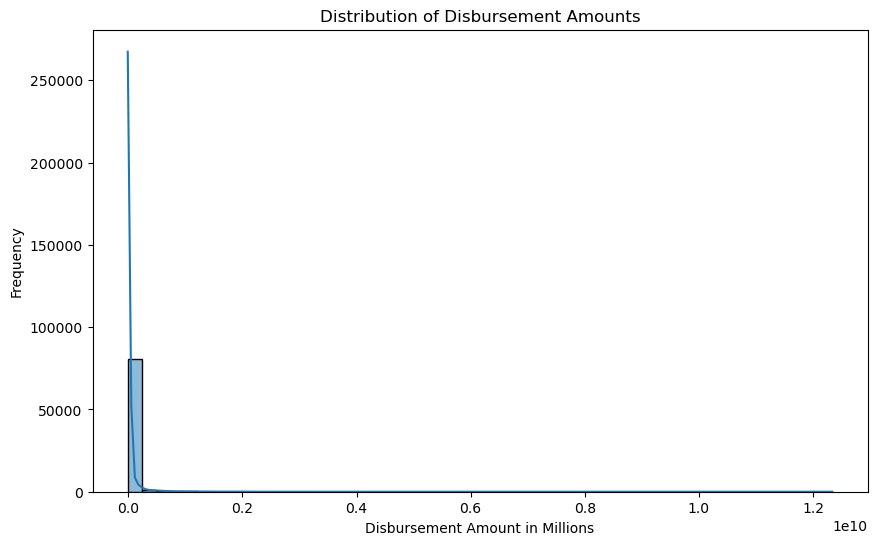

In [13]:
# Distribution of Disbursement
plt.figure(figsize=(10, 6))
sns.histplot(df['disbursement'], bins=50, kde=True)
plt.title('Distribution of Disbursement Amounts')
plt.xlabel('Disbursement Amount in Millions')
plt.ylabel('Frequency')
plt.show()


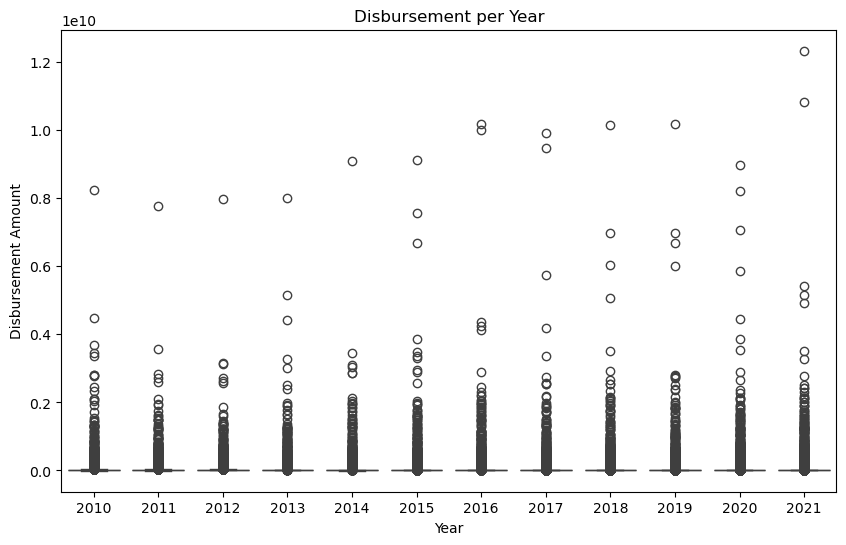

In [8]:
# Disbursement per year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='disbursement', data=df)
plt.title('Disbursement per Year')
plt.xlabel('Year')
plt.ylabel('Disbursement Amount')
plt.show()


/var/folders/q8/h84q0j0n73j23m6f49kgzm_w0000gn/T/ipykernel_94090/1618207721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_donors.values, y=top_donors.index, palette='viridis')


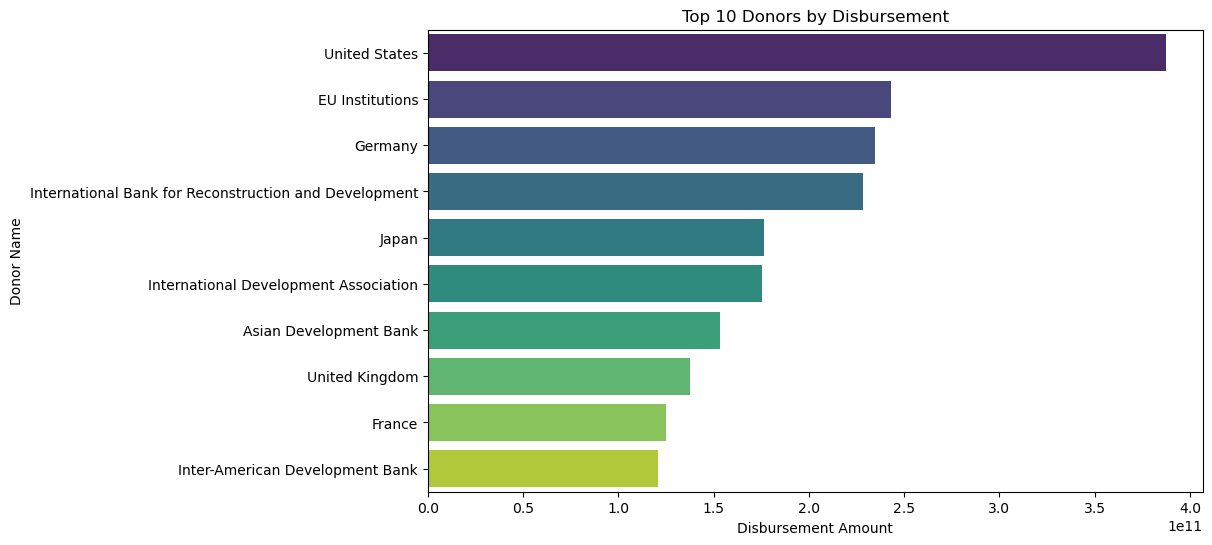

In [9]:
# Donor Contribution Analysis
top_donors = df.groupby('donor_name')['disbursement'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_donors.values, y=top_donors.index, palette='viridis')
plt.title('Top 10 Donors by Disbursement')
plt.xlabel('Disbursement Amount')
plt.ylabel('Donor Name')
plt.show()



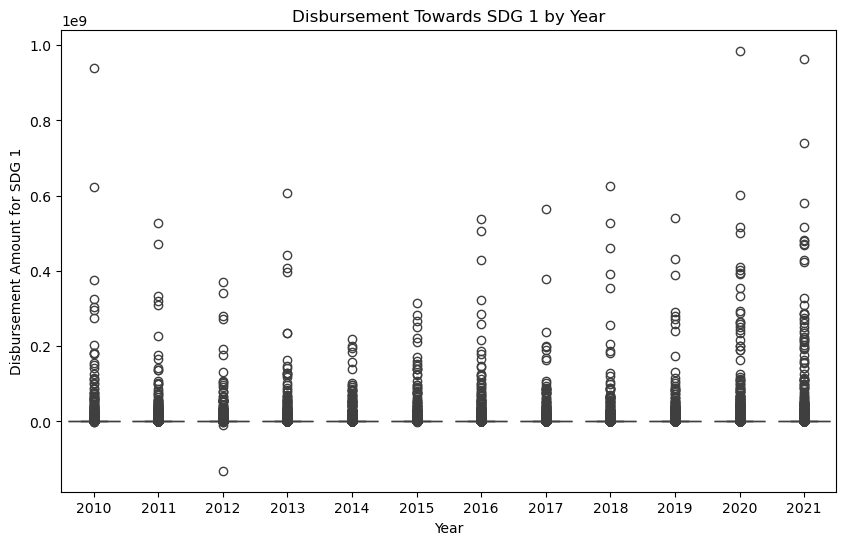

In [10]:
# Disbursement by SDG (SDG 1 as an example)
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='sdg_1_sum', data=df)
plt.title('Disbursement Towards SDG 1 by Year')
plt.xlabel('Year')
plt.ylabel('Disbursement Amount for SDG 1')
plt.show()


/var/folders/q8/h84q0j0n73j23m6f49kgzm_w0000gn/T/ipykernel_94090/580685414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_projects.values, y=region_projects.index, palette='coolwarm')


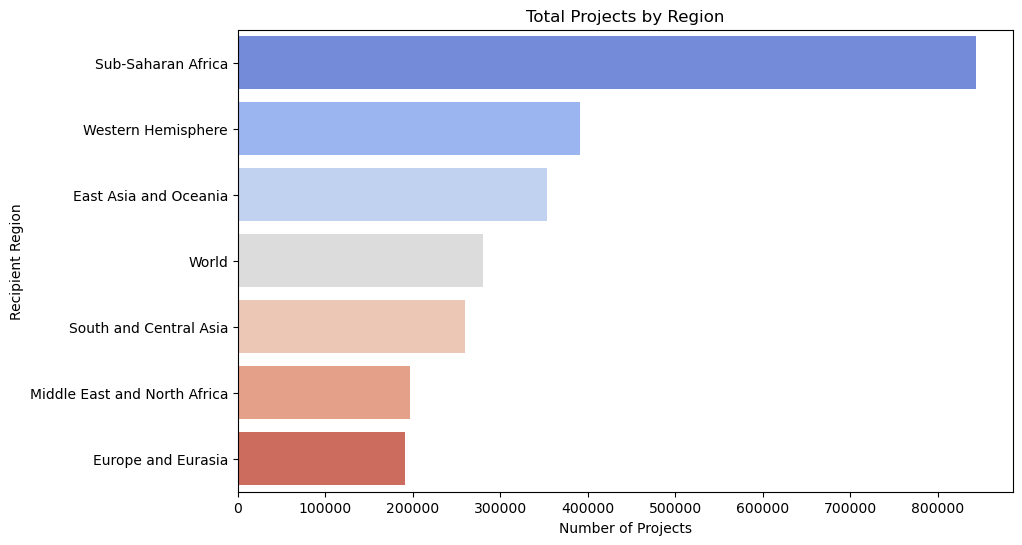

In [11]:
#Projects by Region
region_projects = df.groupby('recipient_region')['total_proj'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_projects.values, y=region_projects.index, palette='coolwarm')
plt.title('Total Projects by Region')
plt.xlabel('Number of Projects')
plt.ylabel('Recipient Region')
plt.show()


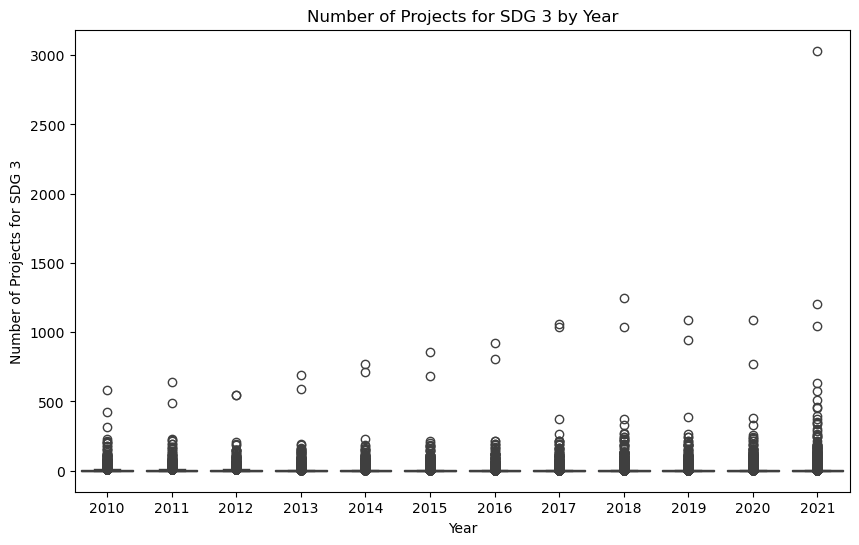

In [12]:
#SDG-specific Project Count Analysis (SDG 3 example)
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='sdg_3_n_proj', data=df)
plt.title('Number of Projects for SDG 3 by Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects for SDG 3')
plt.show()